In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingRegressor
gbc = GradientBoostingRegressor()
from sklearn.ensemble import RandomForestClassifier
r = RandomForestClassifier()
from sklearn.tree import DecisionTreeClassifier
d = DecisionTreeClassifier()
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
from sklearn.neighbors import KNeighborsClassifier
k = KNeighborsClassifier()
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
g = GaussianNB()
b = BernoulliNB()
from xgboost import XGBClassifier
xgbc = XGBClassifier()
from sklearn.model_selection import train_test_split

# creating a neural network model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [2]:
df1 = pd.read_csv("train.csv")

In [3]:
df1.shape

(891, 12)

In [4]:
df2 = pd.read_csv("test.csv")

In [5]:
df2.shape

(418, 11)

In [6]:
df = df1.append(df2) #iki dataframe i birleştirme

In [7]:
df.shape

(1309, 12)

### EDA

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [10]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
315,1207,NaN,3,"Hagardon, Miss. Kate",female,17.0,0,0,AQ/3. 30631,7.7333,NaN,Q
858,859,1.0,3,"Baclini, Mrs. Solomon (Latifa Qurban)",female,24.0,0,3,2666,19.2583,NaN,C
112,113,0.0,3,"Barton, Mr. David John",male,22.0,0,0,324669,8.0500,NaN,S
770,771,0.0,3,"Lievens, Mr. Rene Aime",male,24.0,0,0,345781,9.5000,NaN,S
94,95,0.0,3,"Coxon, Mr. Daniel",male,59.0,0,0,364500,7.2500,NaN,S


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [12]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [13]:
df.Embarked.value_counts() # kaç tane nerden bindiğini gösteriyor

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [14]:
df.Embarked.value_counts(normalize = True) #yüzdelik olarak gösteriyor

S    0.699311
C    0.206580
Q    0.094109
Name: Embarked, dtype: float64

In [15]:
# titleları sırala mr miss diye
df["Title"] = df["Name"].str.extract(" ([A-Za-z]+)\.")
df["Title"].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Title, dtype: int64

In [16]:
#yukarıda ismi yanlış yazılanlar var mesela ms = miss demek o yüzden onları eşitleyeceğiz
df["Title"] = df["Title"].replace(["Ms","Mlle"],"Miss")
df["Title"] = df["Title"].replace(["Mme","Lady","Countess","Dona"],"Mrs")
df["Title"] = df["Title"].replace(["Dr","Major","Col","Sir","Rev","Jonkheer","Capt","Don"],"Mr") #rev papaz

In [17]:
df.Title.value_counts()

Mr        783
Miss      264
Mrs       201
Master     61
Name: Title, dtype: int64

In [18]:
#groupby
df["Age"].fillna(df.groupby("Title")["Age"].transform("median"),inplace=True)
df.groupby("Title")["Age"].transform("median")

0      30.0
1      35.5
2      22.0
3      35.5
4      30.0
       ... 
413    30.0
414    35.5
415    30.0
416    30.0
417     4.0
Name: Age, Length: 1309, dtype: float64

In [19]:
#median bul doldur
df["Fare"].fillna(df["Fare"].mean(),inplace= True)

In [20]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
Title             0
dtype: int64

In [21]:
#kabinda çok boş yani verinin %20 sinden az olduğu için siliyoruz
del df["Cabin"]

In [22]:
#Family olup olmadığını yapıyoruz fillna ile boşluk doldurcaz ayrıca
df["Family"]=df["SibSp"]+df["Parch"]+1

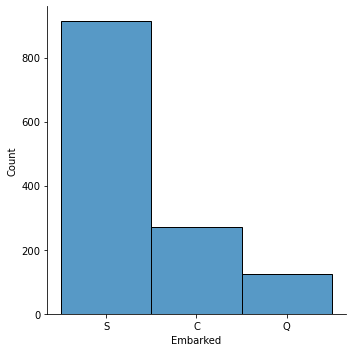

In [23]:
#embarked larda boş olan yerleri doldurma yap
sns.displot(df.Embarked)

In [24]:
#fillna ile en çok binilen yeri dolduruyoruz
df["Embarked"] = df["Embarked"].fillna("S")

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Embarked     1309 non-null   object 
 11  Title        1309 non-null   object 
 12  Family       1309 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 143.2+ KB


In [26]:
# pass id ile ticket bi ayrıcalık sağlmadığı için sliliyoruz
del df["PassengerId"]

In [27]:
del df["Name"]

In [28]:
del df["Ticket"]

In [29]:
#dummies varible uygula
df=pd.get_dummies(df,drop_first=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    float64
 1   Pclass      1309 non-null   int64  
 2   Age         1309 non-null   float64
 3   SibSp       1309 non-null   int64  
 4   Parch       1309 non-null   int64  
 5   Fare        1309 non-null   float64
 6   Family      1309 non-null   int64  
 7   Sex_male    1309 non-null   uint8  
 8   Embarked_Q  1309 non-null   uint8  
 9   Embarked_S  1309 non-null   uint8  
 10  Title_Miss  1309 non-null   uint8  
 11  Title_Mr    1309 non-null   uint8  
 12  Title_Mrs   1309 non-null   uint8  
dtypes: float64(3), int64(4), uint8(6)
memory usage: 89.5 KB


In [31]:
df.shape

(1309, 13)

In [32]:
x, y = df[:891].drop("Survived",axis=1), df[:891][["Survived"]]

In [33]:
x.shape

(891, 12)

In [34]:
y.shape

(891, 1)

In [35]:
model = Sequential()
model.add(Dense(81,activation = "relu"))
model.add(Dense(40,activation = "relu"))
model.add(Dense(27,activation = "relu"))
model.add(Dense(19,activation = "relu"))
model.add(Dense(5,activation = "relu"))
model.add(Dense(3,activation = "relu"))
model.add(Dense(1))


In [36]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])

In [37]:
history = model.fit(x,y,batch_size = 10, epochs = 150, verbose = 1 )

Epoch 1/150
90/90 [==============================] - 1s 2ms/step - loss: 1.1277 - accuracy: 0.6409
Epoch 2/150
90/90 [==============================] - 0s 2ms/step - loss: 0.7254 - accuracy: 0.6667
Epoch 3/150
90/90 [==============================] - 0s 2ms/step - loss: 0.7450 - accuracy: 0.6689
Epoch 4/150
90/90 [==============================] - 0s 3ms/step - loss: 0.7168 - accuracy: 0.6857
Epoch 5/150
90/90 [==============================] - 0s 4ms/step - loss: 1.1280 - accuracy: 0.6543
Epoch 6/150
90/90 [==============================] - 0s 2ms/step - loss: 1.1355 - accuracy: 0.6678
Epoch 7/150
90/90 [==============================] - 0s 2ms/step - loss: 0.7358 - accuracy: 0.6611
Epoch 8/150
90/90 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.6768
Epoch 9/150
90/90 [==============================] - 0s 2ms/step - loss: 0.7067 - accuracy: 0.6947
Epoch 10/150
90/90 [==============================] - 0s 2ms/step - loss: 0.7573 - accuracy: 0.7385
Epoch 11/

90/90 [==============================] - 0s 2ms/step - loss: 0.4180 - accuracy: 0.8148
Epoch 84/150
90/90 [==============================] - 0s 2ms/step - loss: 0.4245 - accuracy: 0.8137
Epoch 85/150
90/90 [==============================] - 0s 2ms/step - loss: 0.4245 - accuracy: 0.8227
Epoch 86/150
90/90 [==============================] - 0s 2ms/step - loss: 0.4463 - accuracy: 0.8193
Epoch 87/150
90/90 [==============================] - 0s 2ms/step - loss: 0.4056 - accuracy: 0.8159
Epoch 88/150
90/90 [==============================] - 0s 2ms/step - loss: 0.4194 - accuracy: 0.8215
Epoch 89/150
90/90 [==============================] - 0s 2ms/step - loss: 0.4079 - accuracy: 0.8204
Epoch 90/150
90/90 [==============================] - 0s 2ms/step - loss: 0.4187 - accuracy: 0.8272
Epoch 91/150
90/90 [==============================] - 0s 2ms/step - loss: 0.5361 - accuracy: 0.7160
Epoch 92/150
90/90 [==============================] - 0s 2ms/step - loss: 0.5071 - accuracy: 0.7912
Epoch 93/150


In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 81)                1053      
                                                                 
 dense_1 (Dense)             (None, 40)                3280      
                                                                 
 dense_2 (Dense)             (None, 27)                1107      
                                                                 
 dense_3 (Dense)             (None, 19)                532       
                                                                 
 dense_4 (Dense)             (None, 5)                 100       
                                                                 
 dense_5 (Dense)             (None, 3)                 18        
                                                                 
 dense_6 (Dense)             (None, 1)                 4

In [39]:
scores=model.evaluate(x,y)

28/28 [==============================] - 0s 2ms/step - loss: 0.4108 - accuracy: 0.8137


In [40]:
print("%s : %.2f%%" % (model.metrics_names[1],scores[1]*100))

accuracy : 81.37%
